Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



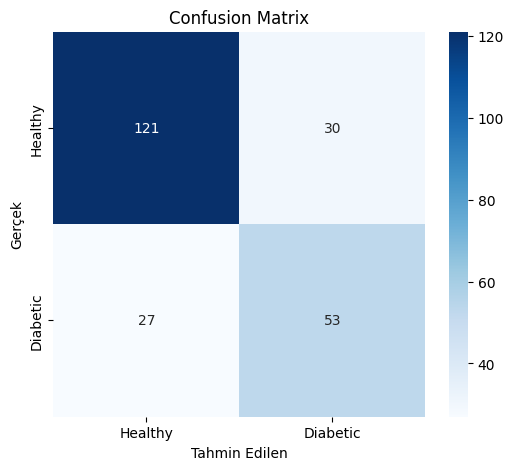

In [ ]:
# 1️⃣ Gerekli kütüphaneler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Veri setini yükle (Pima Indians Diabetes Dataset)
# Veri seti Kaggle'dan veya UCI'den alınabilir, biz direkt URL ile çekelim
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, names=columns)

# 3️⃣ Veriyi özellikler ve etiketler olarak ayır
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 4️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5️⃣ Modeli oluştur ve eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Tahmin yap ve doğruluğu ölç
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Confusion matrix görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy','Diabetic'], yticklabels=['Healthy','Diabetic'])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   
1  0.020584  0.969910  0.832443  0.212339  0.181825  0.183405  0.304242   
2  0.611853  0.139494  0.292145  0.366362  0.456070  0.785176  0.199674   
3  0.607545  0.170524  0.065052  0.948886  0.965632  0.808397  0.304614   
4  0.122038  0.495177  0.034389  0.909320  0.258780  0.662522  0.311711   

     Gene_8    Gene_9   Gene_10  Cluster  
0  0.866176  0.601115  0.708073        1  
1  0.524756  0.431945  0.291229        0  
2  0.514234  0.592415  0.046450        2  
3  0.097672  0.684233  0.440152        2  
4  0.520068  0.546710  0.184854        0  


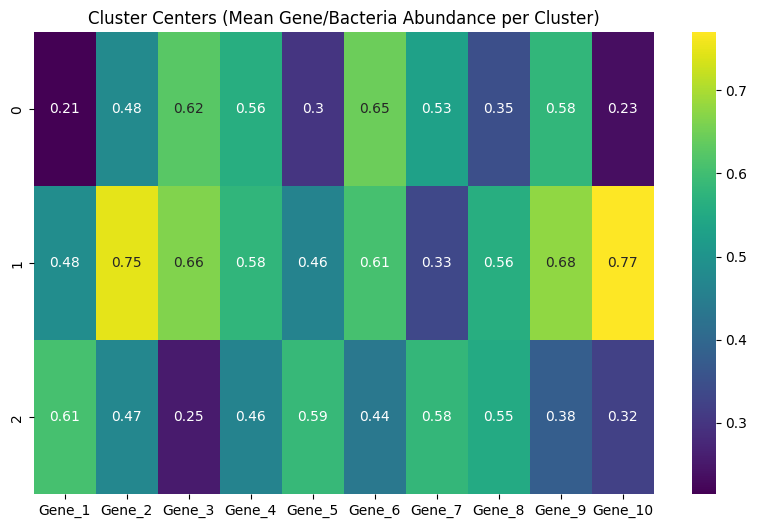

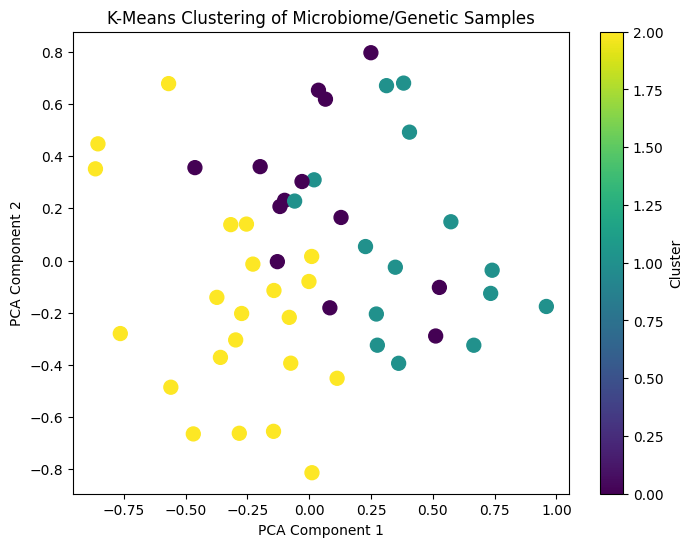

In [ ]:
# 1️⃣ Gerekli kütüphaneler
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Simüle mikrobiyom/gen ekspresyon verisi
# 50 örnek (satır) × 10 bakteri türü/gen (sütun)
np.random.seed(42)
X = np.random.rand(50, 10)

# 3️⃣ K-Means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 4️⃣ Sonuçları DataFrame ile birleştir
df = pd.DataFrame(X, columns=[f'Gene_{i+1}' for i in range(X.shape[1])])
df['Cluster'] = labels
print(df.head())

# 5️⃣ Küme merkezlerini görselleştir
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1]), annot=True, cmap='viridis')
plt.title("Cluster Centers (Mean Gene/Bacteria Abundance per Cluster)")
plt.show()

# 6️⃣ Örnek dağılımını 2 boyutta görselleştirmek için PCA kullanabiliriz
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Microbiome/Genetic Samples")
plt.colorbar(label='Cluster')
plt.show()


In [1]:
# 1️⃣ Gerekli kütüphaneler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 2️⃣ RNA dizilerini encode et
# A=0, C=1, G=2, U=3
def encode_rna(seq):
    mapping = {'A':0, 'C':1, 'G':2, 'U':3}
    return [mapping[x] for x in seq]

# 3️⃣ Dummy RNA veri seti
rna_seqs = ["ACGUACGUAC", "UGCAUGCAUG", "AAAAACCCCC", "GGGGUUUUAA"]
X = np.array([encode_rna(s) for s in rna_seqs])
y = np.array([1, 0, 1, 0])  # 1=promoter, 0=non-promoter

# 4️⃣ LSTM için reshape [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 5️⃣ Modeli oluştur
model = Sequential([
    LSTM(16, input_shape=(X.shape[1],1)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6️⃣ Modeli eğit
model.fit(X, y, epochs=30, verbose=1)

# 7️⃣ Tahmin örneği
test_seq = "ACGUACGUAC"
test_array = np.array(encode_rna(test_seq)).reshape(1, len(test_seq), 1)
pred = model.predict(test_array)
print(f"Prediction for {test_seq}: {pred[0][0]:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7030
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7014
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7006
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6995
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6983
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6971
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6959
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6947
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6935
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6924
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6913
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6904
Epoch 13/30
1/

In [3]:
# 1️⃣ Gerekli kütüphaneler
import pandas as pd
from sklearn.linear_model import LinearRegression

# 2️⃣ Örnek enzim aktivitesi veri seti
# Özellikler: pH, sıcaklık (°C), substrat konsantrasyonu (mM), iyonik güç (mM)
# Çıktı: Enzim aktivitesi (μmol/min)
data = {
    "pH": [6.5, 7.0, 6.0, 8.0, 7.5],
    "temperature": [25, 37, 30, 40, 35],
    "substrate_conc": [5, 10, 2, 15, 8],
    "ionic_strength": [50, 100, 20, 150, 80],
    "activity": [12.5, 20.1, 8.7, 25.3, 18.4],  # μmol/min
}

df = pd.DataFrame(data)

# 3️⃣ Özellikleri ve hedefi ayır
X = df[["pH", "temperature", "substrate_conc", "ionic_strength"]]
y = df["activity"]

# 4️⃣ Modeli oluştur ve eğit
model = LinearRegression().fit(X, y)

# 5️⃣ Model parametreleri ve tahmin
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 6️⃣ Örnek tahmin: pH=7.2, temp=36°C, substrat=9 mM, iyonik güç=90 mM
predicted_activity = model.predict([[7.2, 36, 9, 90]])[0]
print(f"Predicted enzyme activity: {predicted_activity:.2f} μmol/min")


Coefficients: [1.77803692 0.11342658 0.00915228 0.09152277]
Intercept: -6.629745631341599
Predicted enzyme activity: 18.57 μmol/min


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# 1️⃣ Gerekli kütüphaneler
import numpy as np
from sklearn.svm import SVC

# 2️⃣ Simüle edilmiş ilaç özellikleri (10 özellikli descriptor)
np.random.seed(42)
X = np.random.rand(50, 10)  # 50 ilaç örneği × 10 özellik
y = np.random.randint(0, 2, 50)  # 1 = ilaç hedef üzerinde etkili, 0 = etkisiz

# 3️⃣ SVM sınıflandırıcı oluştur ve eğit
model = SVC(kernel='rbf', probability=True)
model.fit(X, y)

# 4️⃣ Yeni ilaç örneği ile tahmin
new_drug = np.random.rand(1, 10)
prob = model.predict_proba(new_drug)[0, 1]
print("Predicted probability of drug effect on target:", prob)

# 5️⃣ Sınıf tahmini (0 veya 1)
class_pred = model.predict(new_drug)[0]
print("Predicted class (0=No Effect, 1=Effect):", class_pred)


Predicted probability of drug effect on target: 0.35419308096819024
Predicted class (0=No Effect, 1=Effect): 0


In [2]:
# =========================
# Gerekli kütüphaneler
# =========================
# pip install biopython requests matplotlib --break-system-packages
# pip install DeepPurpose --break-system-packages

import requests, io
from Bio import SeqIO
from DeepPurpose import DTI, utils

# =========================
# Kullanıcı girişleri
# =========================
# Örnek Antikor dizisi (FASTA veya amino asit dizisi)
antibody_seq = "EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLEWVSAISGSGGSTYYADSVKGRFTISRDNAKNSLYLQMNSLRAEDTAVYYCAR"
# Örnek Antijen dizisi (FASTA veya amino asit dizisi)
antigen_seq = "MKTIIALSYIFCLVFADYKDDDDKIVGGYTCAKEISDVKDDDDKIVGGYTCAK"

print("Antikor dizisi uzunluğu:", len(antibody_seq))
print("Antijen dizisi uzunluğu:", len(antigen_seq))

# =========================
# DeepPurpose ile veri hazırlama
# =========================
X_pred = utils.data_process(
    X_drug=[antibody_seq],       # Burada antikor SMILES yerine amino asit dizisi
    X_target=[antigen_seq],      # Antijen dizisi
    y=[0],                       # Dummy label
    drug_encoding='AAC',         # Amino acid composition encoding
    target_encoding='CNN',       # Protein CNN encoding
    split_method='no_split'
)

# =========================
# Model yükleme ve tahmin
# =========================
model = DTI.model_pretrained(model='AAC_CNN_BindingDB')  # Amino acid composition + CNN modeli
prediction = model.predict(X_pred)[0]

print(f"\nPredicted Antibody-Antigen Binding Affinity Score: {prediction:.4f}")

ModuleNotFoundError: No module named 'Bio'

In [4]:
!pip install biopython requests matplotlib DeepPurpose --break-system-packages

In [6]:
# =========================
# Gerekli kütüphaneler
# =========================
# pip install biopython requests matplotlib --break-system-packages
# pip install DeepPurpose --break-system-packages
# pip install rdkit-pypi --break-system-packages

import requests, io
from Bio import SeqIO
from DeepPurpose import DTI, utils

# =========================
# Kullanıcı girişleri
# =========================
# Hedef protein dizisi (FASTA formatında veya amino asit dizisi)
protein_seq = "MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAG"

# İlaç kombinasyonu SMILES
drug1_smiles = "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)C4=NC=CC(=N4)C5=CN=CC=C5"  # Imatinib
drug2_smiles = "CCOC(=O)C1=CC=CC=C1C(=O)OCC"  # Aspirin (örnek)

# Basitleştirilmiş kombinasyon için SMILES’leri birleştirebiliriz
combo_smiles = drug1_smiles + "." + drug2_smiles

print("Protein sequence length:", len(protein_seq))
print("Drug combination SMILES length:", len(combo_smiles))

# =========================
# DeepPurpose veri hazırlama
# =========================
X_pred = utils.data_process(
    X_drug=[combo_smiles],      # İlaç kombinasyonu
    X_target=[protein_seq],     # Hedef protein
    y=[0],                      # Dummy label
    drug_encoding='Morgan',     # Molekül descriptor
    target_encoding='CNN',      # Protein CNN encoding
    split_method='no_split'
)

# =========================
# Model yükleme ve tahmin
# =========================
model = DTI.model_pretrained(model='Morgan_CNN_BindingDB')
prediction = model.predict(X_pred)[0]

print(f"\nPredicted Binding Affinity Score for Drug Combination: {prediction:.4f}")

ModuleNotFoundError: No module named 'rdkit'

In [8]:
!pip install rdkit --break-system-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 33.5 MB/s eta 0:00:00


In [9]:
!pip install biopython requests matplotlib --break-system-packages
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --break-system-packages
!pip install DeepPurpose --break-system-packages
!pip install rdkit-pypi --break-system-packages
!pip install git+https://github.com/bp-kelley/descriptastorus --break-system-packages


Looking in indexes: https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-o3kpnmnu
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-o3kpnmnu
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1082893 sha256=9c769cfe640909db5421c4a64cd2ad70e48577ff8365f722b3c8594ac0d19829
  Stored in directory: /tmp/pip-ephem-wheel-cache-8p0csgw1/wheels/69/35/be/6711ca7baad9068ecd0ddfe50b4474e29596ac80bf52010b13
Successfully built descriptastorus


In [10]:
# =========================
# Colab için tüm gerekli kütüphaneleri yükleme
# =========================

# 1️⃣ Temel kütüphaneler
!pip install biopython requests matplotlib --break-system-packages

# 2️⃣ PyTorch (CPU versiyonu)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --break-system-packages

# 3️⃣ DeepPurpose
!pip install DeepPurpose --break-system-packages

# 4️⃣ RDKit (SMILES ve molekül descriptorları için)
!pip install rdkit-pypi --break-system-packages

# 5️⃣ Descriptastorus (DeepPurpose için opsiyonel)
!pip install git+https://github.com/bp-kelley/descriptastorus --break-system-packages


Looking in indexes: https://download.pytorch.org/whl/cpu
ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-8tu5wtlc
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-8tu5wtlc
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done


In [11]:
# =========================
# Gerekli kütüphaneler
# =========================
# pip install biopython requests matplotlib --break-system-packages
# pip install DeepPurpose --break-system-packages
# pip install rdkit-pypi --break-system-packages

import requests, io
from Bio import SeqIO
from DeepPurpose import DTI, utils

# =========================
# Hedef protein dizisi (FASTA veya amino asit dizisi)
protein_seq = "MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAG"

# İlaç kombinasyonu SMILES
drug1_smiles = "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)C4=NC=CC(=N4)C5=CN=CC=C5"  # Imatinib
drug2_smiles = "CCOC(=O)C1=CC=CC=C1C(=O)OCC"  # Aspirin (örnek)

# SMILES’leri birleştiriyoruz (DeepPurpose bunu descriptor çıkarırken kabul edebilir)
combo_smiles = drug1_smiles + "." + drug2_smiles

print("Protein sequence length:", len(protein_seq))
print("Drug combination SMILES length:", len(combo_smiles))

# =========================
# DeepPurpose veri hazırlama
X_pred = utils.data_process(
    X_drug=[combo_smiles],
    X_target=[protein_seq],
    y=[0],                   # Dummy label
    drug_encoding='Morgan',  # Molekül descriptor
    target_encoding='CNN',   # Protein CNN encoding
    split_method='no_split'
)

# =========================
# Model yükleme ve tahmin
model = DTI.model_pretrained(model='Morgan_CNN_BindingDB')
prediction = model.predict(X_pred)[0]

print(f"\nPredicted Binding Affinity Score for Drug Combination: {prediction:.4f}")


Protein sequence length: 60
Drug combination SMILES length: 99
Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data


[11:50:16] DEPRECATION WARNING: please use MorganGenerator


pretrained model Successfully Downloaded...
predicting...

Predicted Binding Affinity Score for Drug Combination: 5.0149
